In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import coint

In [2]:
sp = pd.read_csv('sp500_stock.csv')
dta = pd.read_csv('broader_stock.csv')

In [3]:
def data_preprocess(dta):
    dta['Date'] = pd.to_datetime(dta['Date'], format='%Y-%m-%d')
    dta = dta.set_index(dta['Date'])
    # NHLI not traded
    dta.drop(['Date', 'NHLI'], axis=1, inplace=True)
    dta.dropna(how='all', inplace=True)
    for tick in dta.columns:
        tick_series = dta[tick]
        start_pos = tick_series.first_valid_index()
        valid_series = tick_series.loc[start_pos:]
        if valid_series.isna().sum() > 0:
            dta.drop(tick, axis=1, inplace=True)

    for tick in dta.columns:
        dta[tick] = dta[tick].mask(dta[tick] == 0).ffill(downcast='infer')

    return dta[dta.index >= dta['SPY'].first_valid_index()]

In [4]:
sp = data_preprocess(sp)
dta = data_preprocess(dta)

In [5]:
dta.columns

Index(['AME', 'NOW', 'XYL', 'BAC', 'TGI', 'AMBC', 'NSP', 'MOS', 'MEI', 'PSB',
       ...
       'DY', 'VECO', 'AIV', 'LNN', 'TDY', 'BBBY', 'K', 'BEN', 'THRM', 'PAYX'],
      dtype='object', length=1302)

In [8]:
tick = 'AME'

test = dta[tick]

In [25]:
if tick in sp.columns:
    temp = pd.concat([sp.drop([tick], axis=1), test], axis=1).dropna(axis=1)
    temp['%s_LAG' % tick] = temp[tick].shift(-120)
    temp.dropna(inplace=True)

    y = temp['%s_LAG' % tick]
    cointegrat = {}
    correlat = {}

    for i in temp.columns[:-2]:
        x = temp[i]
        score, pval, _ = coint(x, y, trend='ct')
        corr = x.corr(y)

        cointegrat[i] = pval
        correlat[i] = corr

    best_coint = sorted(cointegrat, key=cointegrat.get)[:10]
    best_corr = sorted(correlat, key=correlat.get, reverse=True)[:10]

    intersect = list(set(best_coint) & set(best_corr))



In [31]:
temp = pd.concat([sp.drop(['AME'], axis=1), test], axis=1).dropna(axis=1)

In [39]:
temp

,NKE,DDS,IPG,LLY,MTG,WY,CI,AON,CCEP,CSCO,...,R,NSC,VAL,EMR,TEX,XOM,TER,SPY,AME,AME_LAG
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,0.14,40.53,6.28,4.03,11.21,17.35,3.42,7.04,1.37,0.94,...,13.17,8.34,7.9348,3.62,4.37,3.41,3.41,26.18,0.71,0.70
1993-02-01,0.14,40.01,6.33,3.99,11.48,17.56,3.55,7.18,1.37,0.96,...,13.11,8.57,7.5570,3.62,4.55,3.43,3.26,26.37,0.71,0.69
1993-02-02,0.14,40.43,6.09,3.94,11.59,17.62,3.54,7.25,1.36,0.98,...,13.44,8.59,7.9348,3.59,4.66,3.47,3.24,26.43,0.71,0.69
1993-02-03,0.14,42.19,6.37,4.02,11.72,17.56,3.66,7.33,1.37,0.97,...,13.65,8.74,7.9348,3.67,4.61,3.49,3.44,26.71,0.71,0.68
1993-02-04,0.15,42.19,6.37,4.01,11.95,17.83,3.73,7.63,1.37,0.97,...,13.98,8.86,7.5570,3.76,4.78,3.63,3.50,26.82,0.71,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,97.21,23.90,18.56,159.72,7.52,27.48,175.50,206.58,41.64,47.19,...,42.40,189.01,0.6300,62.97,20.38,43.22,88.32,323.22,93.05,99.04
2020-07-28,96.27,24.43,18.41,161.86,7.66,27.25,175.75,205.30,41.06,46.28,...,41.57,184.20,0.6100,61.84,19.66,42.71,87.00,321.17,92.08,99.25
2020-07-29,96.97,24.94,18.91,160.97,8.06,28.35,181.80,205.36,41.79,46.71,...,37.41,191.88,0.6300,63.30,20.27,43.18,88.77,325.12,94.35,101.23


In [41]:
temp.columns[:-2]

Index(['NKE', 'DDS', 'IPG', 'LLY', 'MTG', 'WY', 'CI', 'AON', 'CCEP', 'CSCO',
       ...
       'NUE', 'FISV', 'R', 'NSC', 'VAL', 'EMR', 'TEX', 'XOM', 'TER', 'SPY'],
      dtype='object', length=309)

In [49]:
y = temp['AME_LAG']
cointegrat = {}
correlat = {}

for i in temp.columns[:-2]:
    x = temp[i]
    score, pval, _ = coint(x, y)
    corr = x.corr(y)

    cointegrat[i] = pval
    correlat[i] = corr

In [45]:
x = temp['NKE']

In [64]:
a = sorted(cointegrat, key=cointegrat.get)[:10]
b = sorted(correlat, key=correlat.get, reverse=True)[:10]

In [65]:
list(set(a) & set(b))

['TROW', 'ECL', 'PH']

In [26]:
intersect

['PH', 'APH', 'OKE', 'UNP']

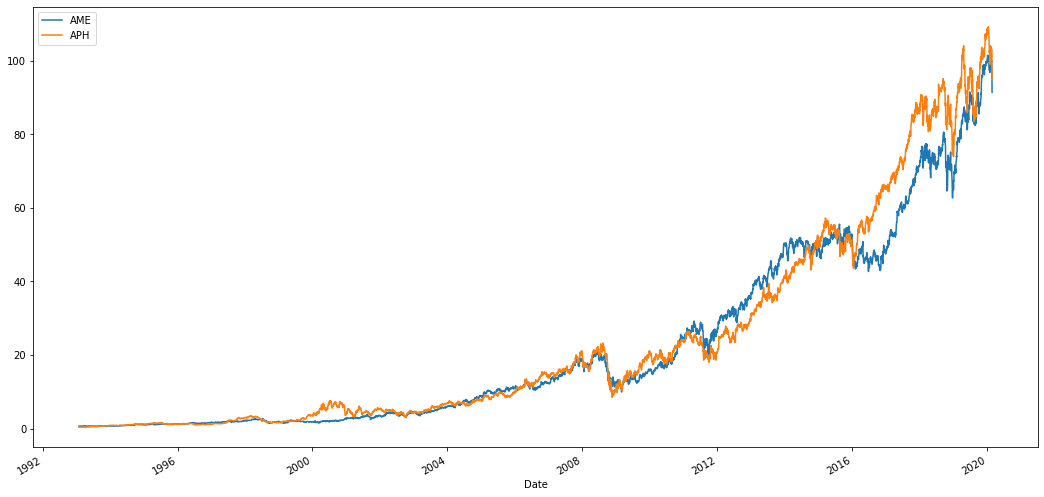

In [29]:
plt.figure(figsize=(18,9))
(temp['AME']).plot()
temp['APH'].plot()
plt.legend(['AME', 'APH'])

In [36]:
X = temp[['PH', 'APH', 'OKE', 'UNP']]
Y = temp['AME_LAG']

In [37]:
mod = sm.OLS(Y, X ).fit()

In [38]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AME_LAG   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.203e+05
Date:                Fri, 28 Aug 2020   Prob (F-statistic):                        0.00
Time:                        16:31:10   Log-Likelihood:                         -19386.
No. Observations:                6817   AIC:                                  3.878e+04
Df Residuals:                    6813   BIC:                                  3.881e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PH             0.1712      0.004     42.635      0.000       0.163       0.179
APH            0.0680      0.014      4.812      0.000       0.040       0.096
OKE            0.3295      0.016     20.367      0.000       0.298       0.361
UNP            0.2002      0.009     21.308      0.000       0.182       0.219
==============================================================================
Omnibus:                      690.510   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4880.007
Skew:                          -0.200   Prob(JB):                         0.00
Kurtosis:                       7.126   Cond. No.                         40.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
mod.fittedvalues

Date
1993-01-29      1.108775
1993-02-01      1.125282
1993-02-02      1.131842
1993-02-03      1.141765
1993-02-04      1.144506
                 ...    
2020-02-19    103.040650
2020-02-20    103.893945
2020-02-21    103.275275
2020-02-24     99.351880
2020-02-25     96.113091
Length: 6817, dtype: float64

In [40]:
y_pred = mod.predict()

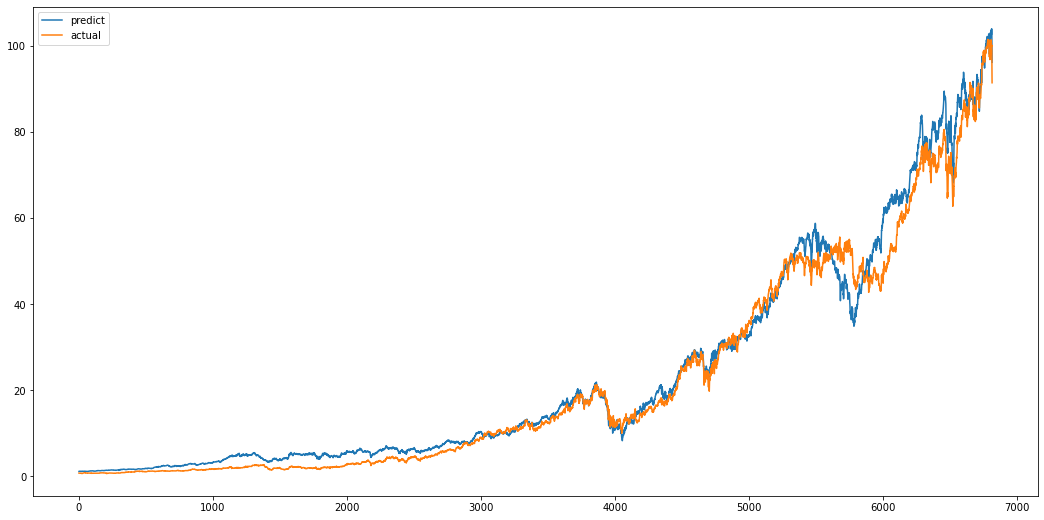

In [44]:
plt.figure(figsize=(18,9))
plt.plot(y_pred)
plt.plot(temp['AME'].values)
plt.legend(['predict', 'actual'])


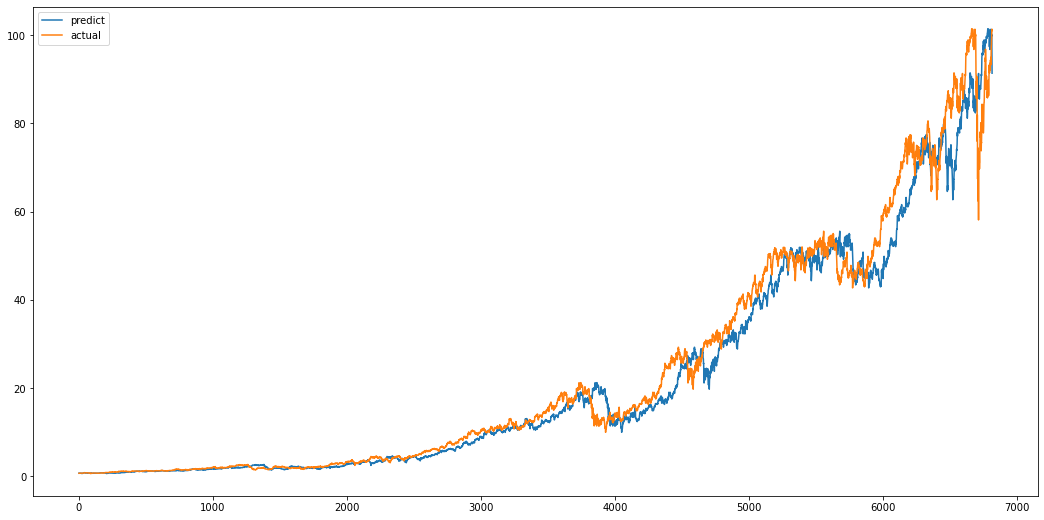

In [63]:
plt.figure(figsize=(18,9))
plt.plot(temp['AME'].values)
plt.plot(temp['AME_LAG'].values)
plt.legend(['predict', 'actual'])


In [74]:
inventory = 0
asset = 0
record = [0]
forecast_diff = y_pred

for t in range(len(forecast_diff)):
    trend_good = forecast_diff[t] > temp['AME'].iloc[t]
    price = temp['AME'].iloc[t]
    if trend_good and inventory == 0:
        # buy
        asset -= price
        inventory += 1
    elif not trend_good and inventory == 1:
        # sell
        asset += price
        inventory -= 1
    else:
        asset = record[-1]
    record.append(asset)


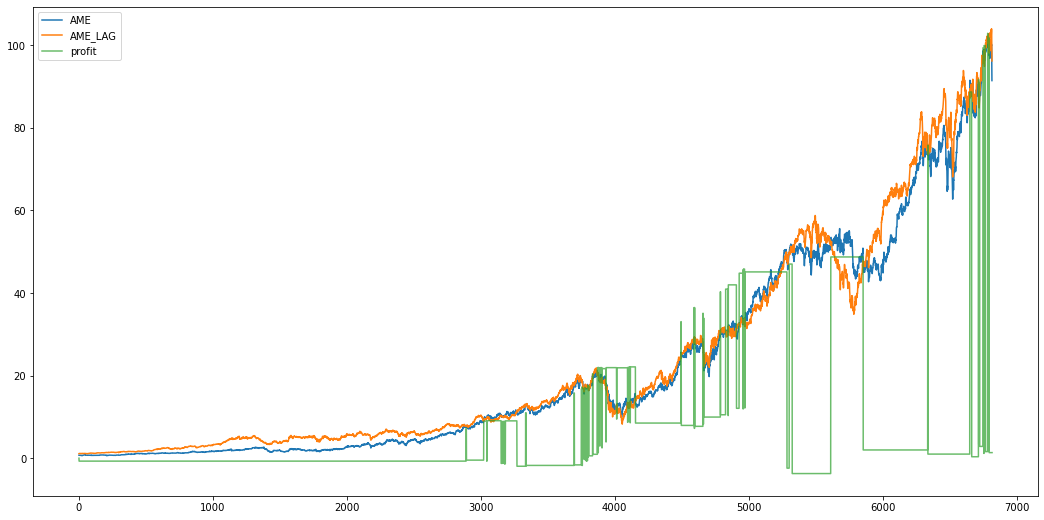

In [76]:
plt.figure(figsize=(18,9))
plt.plot(temp['AME'].values)
plt.plot(y_pred)
plt.plot(record, alpha=0.7)
plt.legend(['AME', 'AME_LAG', 'profit'])

